# Analise Inadimplencia clientes
# Julho/2023

### Importacao das Bibliotecas

In [114]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



### Carga dos Dados

In [2]:
df_conc = pd.read_csv("concessao.csv")
df_inad = pd.read_csv ("inadimplencia.csv")

### Checando os dados

In [3]:
df_conc.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           30000 non-null  int64  
 1   data_concessao       30000 non-null  object 
 2   valor_emprestado     30000 non-null  float64
 3   valor_parcela        30000 non-null  float64
 4   valor_taxa           30000 non-null  float64
 5   valor_prazo          30000 non-null  int64  
 6   valor_renda          30000 non-null  float64
 7   valor_restritivos    30000 non-null  float64
 8   cat_escolaridade     29586 non-null  object 
 9   flag_cliente_ativo   30000 non-null  int64  
 10  cod_agencia          30000 non-null  int64  
 11  data_nascimento      30000 non-null  object 
 12  data_abertura_conta  30000 non-null  object 
dtypes: float64(5), int64(4), object(4)
memory usage: 3.0+ MB


In [4]:
df_conc.head(5)

,id_cliente,data_concessao,valor_emprestado,valor_parcela,valor_taxa,valor_prazo,valor_renda,valor_restritivos,cat_escolaridade,flag_cliente_ativo,cod_agencia,data_nascimento,data_abertura_conta
0,1,2021-12-28,4449.81,621.66,0.048425,9,3574.32,42.11,Fundamental Completo,1,78,1968-03-14,2019-09-04
1,2,2020-10-02,12822.78,1119.39,0.035763,15,4140.87,5.21,Médio Incompleto,1,89,1975-08-01,2019-12-06
2,3,2020-10-01,11683.15,1540.47,0.035673,9,2505.74,0.00,Médio Incompleto,1,61,1988-05-03,2019-10-22
3,4,2022-02-10,9704.14,1844.53,0.038896,6,5895.24,59.26,Não Declarado,0,11,1990-05-15,2020-09-21
4,5,2022-04-05,17875.28,3937.49,0.033076,5,6437.35,38.02,Não Declarado,1,69,1968-08-16,2020-10-19


In [5]:
print(df_conc.isnull().sum())

id_cliente               0
data_concessao           0
valor_emprestado         0
valor_parcela            0
valor_taxa               0
valor_prazo              0
valor_renda              0
valor_restritivos        0
cat_escolaridade       414
flag_cliente_ativo       0
cod_agencia              0
data_nascimento          0
data_abertura_conta      0
dtype: int64


In [6]:
df_conc.describe()

,id_cliente,valor_emprestado,valor_parcela,valor_taxa,valor_prazo,valor_renda,valor_restritivos,flag_cliente_ativo,cod_agencia
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,13121.928950,1805.394651,0.039956,9.025133,3605.877808,57.254038,0.796367,66.566300
std,8660.398374,12824.404217,1543.777525,0.004987,3.732135,2337.874781,86.745450,0.402706,23.387724
min,1.000000,344.980000,120.540000,0.018720,3.000000,1200.000000,0.000000,0.000000,1.000000
25%,7500.750000,4867.690000,783.232500,0.036632,6.000000,1990.735000,0.000000,1.000000,50.000000
50%,15000.500000,9219.040000,1361.240000,0.039957,9.000000,2983.270000,21.610000,1.000000,70.000000
75%,22500.250000,16904.042500,2333.962500,0.043295,12.000000,4511.502500,82.850000,1.000000,86.000000
max,30000.000000,190806.750000,23401.530000,0.060546,15.000000,32372.010000,1231.350000,1.000000,99.000000


In [7]:
df_inad.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257960 entries, 0 to 257959
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id_cliente         257960 non-null  int64 
 1   data_referencia    257960 non-null  object
 2   flag_inadimplente  257960 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.9+ MB


In [8]:
df_inad.head(5)

,id_cliente,data_referencia,flag_inadimplente
0,1,2022-01-31,0
1,1,2022-02-28,0
2,1,2022-03-31,0
3,1,2022-04-30,0
4,1,2022-05-31,0


In [9]:
print(df_inad.isnull().sum())

id_cliente           0
data_referencia      0
flag_inadimplente    0
dtype: int64


In [10]:
df_inad.describe()

,id_cliente,flag_inadimplente
count,257960.000000,257960.000000
mean,14982.762560,0.194201
std,8656.289386,0.395585
min,1.000000,0.000000
25%,7477.000000,0.000000
50%,14998.000000,0.000000
75%,22459.000000,0.000000
max,29999.000000,1.000000


### Join das duas tabelas

In [ ]:
df = pd.merge(df_inad, df_conc, on = "id_cliente")

In [12]:
df.head(10)

,id_cliente,data_referencia,flag_inadimplente,data_concessao,valor_emprestado,valor_parcela,valor_taxa,valor_prazo,valor_renda,valor_restritivos,cat_escolaridade,flag_cliente_ativo,cod_agencia,data_nascimento,data_abertura_conta
0,1,2022-01-31,0,2021-12-28,4449.81,621.66,0.048425,9,3574.32,42.11,Fundamental Completo,1,78,1968-03-14,2019-09-04
1,1,2022-02-28,0,2021-12-28,4449.81,621.66,0.048425,9,3574.32,42.11,Fundamental Completo,1,78,1968-03-14,2019-09-04
2,1,2022-03-31,0,2021-12-28,4449.81,621.66,0.048425,9,3574.32,42.11,Fundamental Completo,1,78,1968-03-14,2019-09-04
3,1,2022-04-30,0,2021-12-28,4449.81,621.66,0.048425,9,3574.32,42.11,Fundamental Completo,1,78,1968-03-14,2019-09-04
4,1,2022-05-31,0,2021-12-28,4449.81,621.66,0.048425,9,3574.32,42.11,Fundamental Completo,1,78,1968-03-14,2019-09-04
5,1,2022-06-30,0,2021-12-28,4449.81,621.66,0.048425,9,3574.32,42.11,Fundamental Completo,1,78,1968-03-14,2019-09-04
6,1,2022-07-31,0,2021-12-28,4449.81,621.66,0.048425,9,3574.32,42.11,Fundamental Completo,1,78,1968-03-14,2019-09-04
7,2,2020-11-30,0,2020-10-02,12822.78,1119.39,0.035763,15,4140.87,5.21,Médio Incompleto,1,89,1975-08-01,2019-12-06
8,2,2020-12-31,0,2020-10-02,12822.78,1119.39,0.035763,15,4140.87,5.21,Médio Incompleto,1,89,1975-08-01,2019-12-06
9,2,2021-01-31,0,2020-10-02,12822.78,1119.39,0.035763,15,4140.87,5.21,Médio Incompleto,1,89,1975-08-01,2019-12-06


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257960 entries, 0 to 257959
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_cliente           257960 non-null  int64  
 1   data_referencia      257960 non-null  object 
 2   flag_inadimplente    257960 non-null  int64  
 3   data_concessao       257960 non-null  object 
 4   valor_emprestado     257960 non-null  float64
 5   valor_parcela        257960 non-null  float64
 6   valor_taxa           257960 non-null  float64
 7   valor_prazo          257960 non-null  int64  
 8   valor_renda          257960 non-null  float64
 9   valor_restritivos    257960 non-null  float64
 10  cat_escolaridade     254028 non-null  object 
 11  flag_cliente_ativo   257960 non-null  int64  
 12  cod_agencia          257960 non-null  int64  
 13  data_nascimento      257960 non-null  object 
 14  data_abertura_conta  257960 non-null  object 
dtypes: float64(5), in

### Transformacoes e criacao de colunas

In [16]:
#Funcao para calcular idade com base no nascimento

def calcular_idade(data_nasc):
    data_atual = datetime.today().date()
    data_nasc = datetime.strptime(data_nasc, '%Y-%m-%d').date()
    idade = data_atual.year - data_nasc.year

    #Checar se o aniversario nao ocorreu
    if data_atual.month < data_nasc.month or (data_atual.month == data_nasc.month and data_atual.day < data_nasc.day):
        idade -= 1
    return idade 

#Calcular idade

df['Idade'] = df['data_nascimento'].apply(calcular_idade)

In [17]:
#Funcao para calculcar meses com base na data referencia do emprestimo
def calcular_meses(data_concessao,data_referencia):
    data_concessao = pd.to_datetime(data_concessao)
    data_referencia = pd.to_datetime(data_referencia)
    diferenca_datas = relativedelta (data_referencia, data_concessao)
    meses = diferenca_datas.years * 12 + diferenca_datas.months
    return meses

#Calcular meses
df['Meses'] = df.apply (lambda row:calcular_meses(row['data_concessao'], row['data_referencia']), axis =1)

In [ ]:
#Criar coluna para uma nova variável comprometimento de renda

df['Comprometimento_Renda'] = df['valor_parcela'] / df['valor_renda'] * 100

In [18]:
df.head(10)

,id_cliente,data_referencia,flag_inadimplente,data_concessao,valor_emprestado,valor_parcela,valor_taxa,valor_prazo,valor_renda,valor_restritivos,cat_escolaridade,flag_cliente_ativo,cod_agencia,data_nascimento,data_abertura_conta,Idade,Meses
0,1,2022-01-31,0,2021-12-28,4449.81,621.66,0.048425,9,3574.32,42.11,Fundamental Completo,1,78,1968-03-14,2019-09-04,55,1
1,1,2022-02-28,0,2021-12-28,4449.81,621.66,0.048425,9,3574.32,42.11,Fundamental Completo,1,78,1968-03-14,2019-09-04,55,2
2,1,2022-03-31,0,2021-12-28,4449.81,621.66,0.048425,9,3574.32,42.11,Fundamental Completo,1,78,1968-03-14,2019-09-04,55,3
3,1,2022-04-30,0,2021-12-28,4449.81,621.66,0.048425,9,3574.32,42.11,Fundamental Completo,1,78,1968-03-14,2019-09-04,55,4
4,1,2022-05-31,0,2021-12-28,4449.81,621.66,0.048425,9,3574.32,42.11,Fundamental Completo,1,78,1968-03-14,2019-09-04,55,5
5,1,2022-06-30,0,2021-12-28,4449.81,621.66,0.048425,9,3574.32,42.11,Fundamental Completo,1,78,1968-03-14,2019-09-04,55,6
6,1,2022-07-31,0,2021-12-28,4449.81,621.66,0.048425,9,3574.32,42.11,Fundamental Completo,1,78,1968-03-14,2019-09-04,55,7
7,2,2020-11-30,0,2020-10-02,12822.78,1119.39,0.035763,15,4140.87,5.21,Médio Incompleto,1,89,1975-08-01,2019-12-06,47,1
8,2,2020-12-31,0,2020-10-02,12822.78,1119.39,0.035763,15,4140.87,5.21,Médio Incompleto,1,89,1975-08-01,2019-12-06,47,2
9,2,2021-01-31,0,2020-10-02,12822.78,1119.39,0.035763,15,4140.87,5.21,Médio Incompleto,1,89,1975-08-01,2019-12-06,47,3


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257960 entries, 0 to 257959
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id_cliente             257960 non-null  int64  
 1   data_referencia        257960 non-null  object 
 2   flag_inadimplente      257960 non-null  int64  
 3   data_concessao         257960 non-null  object 
 4   valor_emprestado       257960 non-null  float64
 5   valor_parcela          257960 non-null  float64
 6   valor_taxa             257960 non-null  float64
 7   valor_prazo            257960 non-null  int64  
 8   valor_renda            257960 non-null  float64
 9   valor_restritivos      257960 non-null  float64
 10  cat_escolaridade       254028 non-null  object 
 11  flag_cliente_ativo     257960 non-null  int64  
 12  cod_agencia            257960 non-null  int64  
 13  data_nascimento        257960 non-null  object 
 14  data_abertura_conta    257960 non-nu

In [21]:
df['cat_escolaridade'].value_counts()

Não Declarado              49683
Sem Escolaridade           42997
Fundamental Incompleto     33927
Fundamental Incompleto     29008
Fundamental Completo       25064
Médio Incompleto           21355
Médio Completo             18707
Superior Incompleto        14940
Superior Completo          11068
Pós-graduação               7279
Name: cat_escolaridade, dtype: int64

In [22]:
#Substuituindo 'Fundamental Incompleto' da variavel cat_escolaridade
df['cat_escolaridade'] = df['cat_escolaridade'].replace('Fundamental Incompleto ','Fundamental Incompleto')


### Análise de Correlacao entre as variáveis do dataset


<AxesSubplot:>

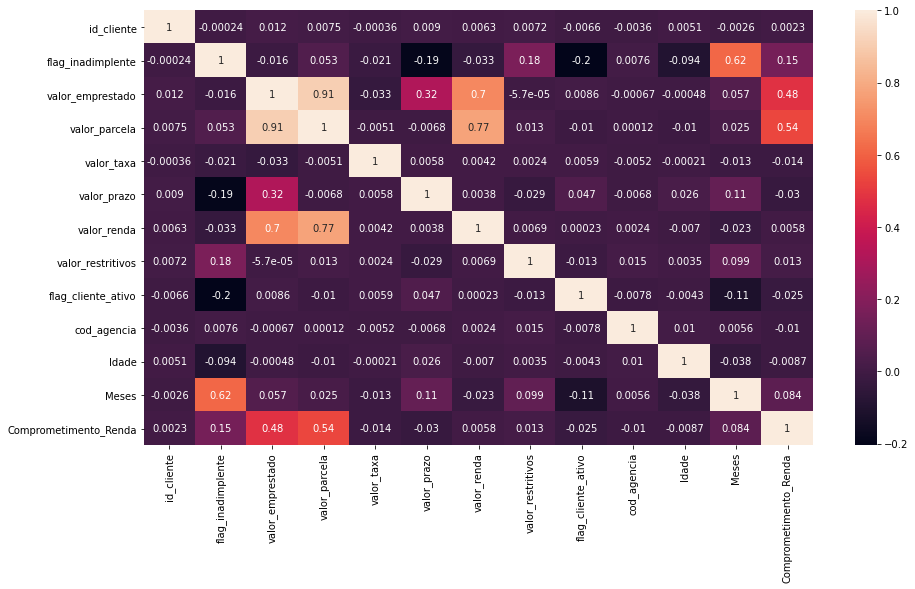

In [23]:
plt.figure (figsize = (15,8))
sns.heatmap(df.corr(), annot = True)

In [24]:
df_sem_duplicadas = df.drop_duplicates(subset = 'id_cliente')

In [25]:
df_sem_duplicadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28700 entries, 0 to 257951
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             28700 non-null  int64  
 1   data_referencia        28700 non-null  object 
 2   flag_inadimplente      28700 non-null  int64  
 3   data_concessao         28700 non-null  object 
 4   valor_emprestado       28700 non-null  float64
 5   valor_parcela          28700 non-null  float64
 6   valor_taxa             28700 non-null  float64
 7   valor_prazo            28700 non-null  int64  
 8   valor_renda            28700 non-null  float64
 9   valor_restritivos      28700 non-null  float64
 10  cat_escolaridade       28306 non-null  object 
 11  flag_cliente_ativo     28700 non-null  int64  
 12  cod_agencia            28700 non-null  int64  
 13  data_nascimento        28700 non-null  object 
 14  data_abertura_conta    28700 non-null  object 
 15  I

<AxesSubplot:xlabel='Idade', ylabel='Density'>

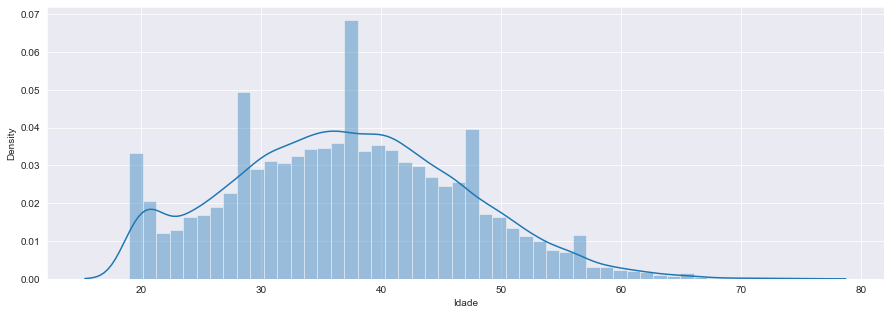

In [115]:
plt.figure(figsize=(15, 5))
sns.distplot(df_sem_duplicadas.Idade)

In [27]:
df_sem_duplicadas.cat_escolaridade.value_counts()/df_sem_duplicadas.shape[0]

Fundamental Incompleto    0.258293
Não Declarado             0.165610
Sem Escolaridade          0.150557
Fundamental Completo      0.106132
Médio Incompleto          0.089443
Médio Completo            0.076620
Superior Incompleto       0.062753
Superior Completo         0.045436
Pós-graduação             0.031429
Name: cat_escolaridade, dtype: float64

In [34]:
df_sem_duplicadas.groupby(['cat_escolaridade']).agg({'cat_escolaridade': 'count','valor_renda':'mean','valor_prazo': 'mean',
                                                    'valor_emprestado': 'mean','Comprometimento_Renda': 'mean'}).sort_values(by =['Comprometimento_Renda'], ascending = False)

,cat_escolaridade,valor_renda,valor_prazo,valor_emprestado,Comprometimento_Renda
cat_escolaridade,,,,,
Superior Completo,1304,3668.528597,9.132669,14061.033765,51.290582
Superior Incompleto,1801,3562.867496,9.050527,13179.680838,50.613723
Sem Escolaridade,4321,3627.513758,8.997917,13238.742865,50.408325
Médio Incompleto,2567,3659.629423,9.034281,13408.931691,50.385209
Não Declarado,4753,3541.397625,9.065012,12919.921934,49.987602
Fundamental Incompleto,7413,3616.208562,9.009713,13156.481217,49.948348
Fundamental Completo,3046,3612.079829,9.008864,13010.954682,49.382349
Médio Completo,2199,3522.883793,8.875853,12494.083524,49.240996
Pós-graduação,902,3585.944479,9.094235,12700.421829,49.073707


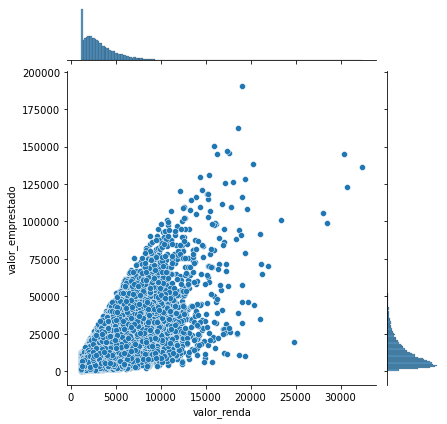

In [35]:
sns.jointplot(data = df_sem_duplicadas, x = 'valor_renda', y ='valor_emprestado')

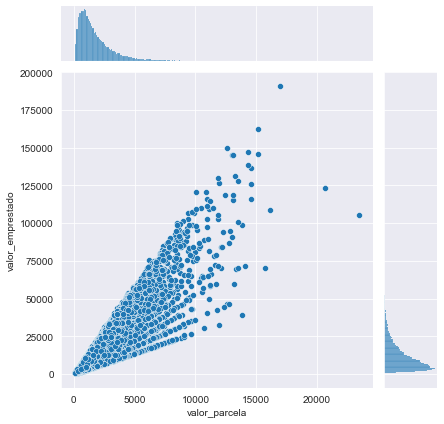

In [124]:
sns.jointplot(data = df_sem_duplicadas, x = 'valor_parcela', y ='valor_emprestado')

Distribuição da variável:
0    207864
1     50096
Name: flag_inadimplente, dtype: int64


Taxa de inadimplentes:
0.19420065126376182


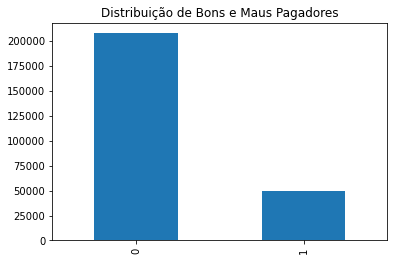

In [37]:
df['flag_inadimplente'].value_counts().plot.bar(title = 'Distribuição de Bons e Maus Pagadores')

print('Distribuição da variável:')
print(df['flag_inadimplente'].value_counts())
print('\n\nTaxa de inadimplentes:')
print(df['flag_inadimplente'].mean())

## Análise clientes igual ou maior que 12 meses

In [125]:
filtro12m = (df['Meses'] >= 12) & (df['flag_inadimplente'] == 1)

In [126]:
df_12meses = df[filtro12m]

In [127]:
df_12meses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29467 entries, 167 to 257939
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             29467 non-null  int64  
 1   data_referencia        29467 non-null  object 
 2   flag_inadimplente      29467 non-null  int64  
 3   data_concessao         29467 non-null  object 
 4   valor_emprestado       29467 non-null  float64
 5   valor_parcela          29467 non-null  float64
 6   valor_taxa             29467 non-null  float64
 7   valor_prazo            29467 non-null  int64  
 8   valor_renda            29467 non-null  float64
 9   valor_restritivos      29467 non-null  float64
 10  cat_escolaridade       28741 non-null  object 
 11  flag_cliente_ativo     29467 non-null  int64  
 12  cod_agencia            29467 non-null  int64  
 13  data_nascimento        29467 non-null  object 
 14  data_abertura_conta    29467 non-null  object 
 15 

In [128]:
df_12meses.head(10)

,id_cliente,data_referencia,flag_inadimplente,data_concessao,valor_emprestado,valor_parcela,valor_taxa,valor_prazo,valor_renda,valor_restritivos,cat_escolaridade,flag_cliente_ativo,cod_agencia,data_nascimento,data_abertura_conta,Idade,Meses,Comprometimento_Renda
167,25,2020-10-31,1,2019-10-29,23896.77,2899.3,0.036786,10,4482.42,53.31,Não Declarado,1,70,1985-03-12,2018-03-02,38,12,64.681578
168,25,2020-11-30,1,2019-10-29,23896.77,2899.3,0.036786,10,4482.42,53.31,Não Declarado,1,70,1985-03-12,2018-03-02,38,13,64.681578
169,25,2020-12-31,1,2019-10-29,23896.77,2899.3,0.036786,10,4482.42,53.31,Não Declarado,1,70,1985-03-12,2018-03-02,38,14,64.681578
170,25,2021-01-31,1,2019-10-29,23896.77,2899.3,0.036786,10,4482.42,53.31,Não Declarado,1,70,1985-03-12,2018-03-02,38,15,64.681578
171,25,2021-02-28,1,2019-10-29,23896.77,2899.3,0.036786,10,4482.42,53.31,Não Declarado,1,70,1985-03-12,2018-03-02,38,16,64.681578
172,25,2021-03-31,1,2019-10-29,23896.77,2899.3,0.036786,10,4482.42,53.31,Não Declarado,1,70,1985-03-12,2018-03-02,38,17,64.681578
173,25,2021-04-30,1,2019-10-29,23896.77,2899.3,0.036786,10,4482.42,53.31,Não Declarado,1,70,1985-03-12,2018-03-02,38,18,64.681578
174,25,2021-05-31,1,2019-10-29,23896.77,2899.3,0.036786,10,4482.42,53.31,Não Declarado,1,70,1985-03-12,2018-03-02,38,19,64.681578
175,25,2021-06-30,1,2019-10-29,23896.77,2899.3,0.036786,10,4482.42,53.31,Não Declarado,1,70,1985-03-12,2018-03-02,38,20,64.681578
176,25,2021-07-31,1,2019-10-29,23896.77,2899.3,0.036786,10,4482.42,53.31,Não Declarado,1,70,1985-03-12,2018-03-02,38,21,64.681578


In [129]:
df_12meses = df_12meses.sort_values('Meses', ascending = False)
df_12meses_sem_duplicados = df_12meses.drop_duplicates(subset = 'id_cliente')

In [130]:
df_12meses_sem_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407 entries, 10776 to 218250
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             2407 non-null   int64  
 1   data_referencia        2407 non-null   object 
 2   flag_inadimplente      2407 non-null   int64  
 3   data_concessao         2407 non-null   object 
 4   valor_emprestado       2407 non-null   float64
 5   valor_parcela          2407 non-null   float64
 6   valor_taxa             2407 non-null   float64
 7   valor_prazo            2407 non-null   int64  
 8   valor_renda            2407 non-null   float64
 9   valor_restritivos      2407 non-null   float64
 10  cat_escolaridade       2338 non-null   object 
 11  flag_cliente_ativo     2407 non-null   int64  
 12  cod_agencia            2407 non-null   int64  
 13  data_nascimento        2407 non-null   object 
 14  data_abertura_conta    2407 non-null   object 
 15

In [131]:
df_12meses_sem_duplicados.head(10)

,id_cliente,data_referencia,flag_inadimplente,data_concessao,valor_emprestado,valor_parcela,valor_taxa,valor_prazo,valor_renda,valor_restritivos,cat_escolaridade,flag_cliente_ativo,cod_agencia,data_nascimento,data_abertura_conta,Idade,Meses,Comprometimento_Renda
10776,1262,2022-07-31,1,2019-08-23,7113.45,798.22,0.036841,11,2033.05,346.01,Fundamental Incompleto,1,88,1985-06-01,2018-04-29,38,35,39.262192
155944,18077,2022-07-31,1,2019-08-22,49233.10,5876.18,0.033533,10,7549.73,118.88,Sem Escolaridade,1,82,1996-04-12,2015-09-26,27,35,77.832982
187262,21753,2022-07-31,1,2019-08-23,3852.12,477.71,0.041174,10,1200.00,104.62,Sem Escolaridade,1,72,1995-10-01,2018-08-19,27,35,39.809167
185240,21524,2022-07-31,1,2019-08-29,35586.26,3989.73,0.036680,11,7983.42,0.00,Sem Escolaridade,0,16,1981-09-07,2018-02-01,41,35,49.975199
126036,14650,2022-07-31,1,2019-08-26,22344.31,3767.61,0.043250,7,6472.87,148.96,Médio Incompleto,1,86,1984-10-24,2018-05-17,38,35,58.206174
180571,20956,2022-07-31,1,2019-08-28,2610.29,296.27,0.038946,11,2313.36,119.66,Sem Escolaridade,0,81,1985-11-05,2017-08-05,37,35,12.806913
150066,17431,2022-07-31,1,2019-08-26,3835.88,1044.40,0.035031,4,2123.53,211.43,Sem Escolaridade,1,69,2001-08-26,2018-09-21,21,35,49.182258
45773,5306,2022-07-31,1,2019-08-27,6074.88,584.62,0.033646,13,2086.27,160.07,Não Declarado,1,49,1994-07-13,2018-06-12,28,35,28.022260
63885,7404,2022-07-31,1,2019-08-22,26212.04,2351.79,0.039651,15,3074.08,112.91,Sem Escolaridade,0,77,1991-01-06,2018-08-26,32,35,76.503865
94514,10956,2022-07-31,1,2019-08-22,3577.03,402.32,0.037268,11,1200.00,79.25,Médio Incompleto,1,75,2000-07-07,2017-12-19,22,35,33.526667


<AxesSubplot:xlabel='Idade', ylabel='Density'>

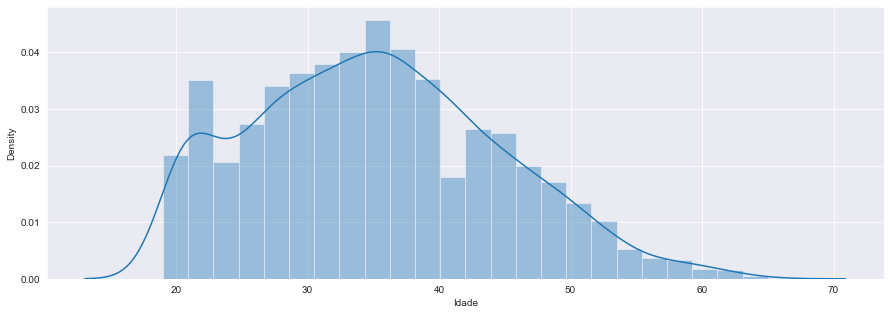

In [166]:
plt.figure(figsize=(15, 5))
sns.distplot(df_12meses_sem_duplicados.Idade)

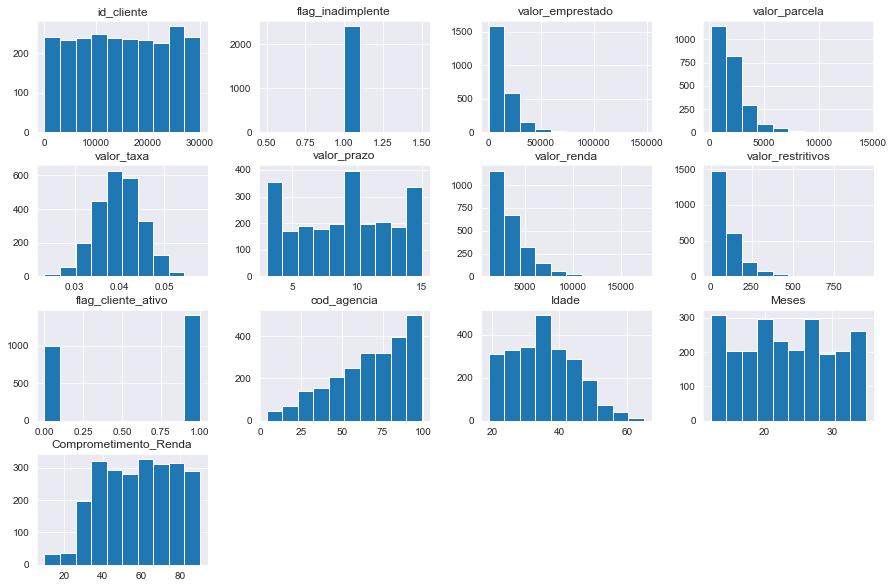

In [64]:
# Plota Histogramas para toda a base de dados filtrando com clientes em atrao (>=12 meses)
sns.set_style('darkgrid')
df_12meses_sem_duplicados.hist(figsize=(15,10))
plt.show()

In [66]:
df_12meses_sem_duplicados.describe()

,id_cliente,flag_inadimplente,valor_emprestado,valor_parcela,valor_taxa,valor_prazo,valor_renda,valor_restritivos,flag_cliente_ativo,cod_agencia,Idade,Meses,Comprometimento_Renda
count,2407.000000,2407.0,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000,2407.000000
mean,15095.248857,1.0,14784.383373,2017.838691,0.039775,9.010802,3450.756635,94.111288,0.587453,66.918571,35.159535,23.242210,58.132201
std,8674.909454,0.0,12789.537532,1445.233903,0.004983,3.658518,2079.785635,100.017399,0.492395,23.480807,9.386517,6.787102,18.624641
min,25.000000,1.0,526.390000,143.920000,0.023276,3.000000,1200.000000,0.000000,0.000000,4.000000,19.000000,12.000000,10.024194
25%,7630.500000,1.0,6438.100000,1003.350000,0.036509,6.000000,1954.410000,11.635000,0.000000,51.000000,28.000000,17.000000,42.428553
50%,15026.000000,1.0,11068.660000,1648.310000,0.039724,9.000000,2904.060000,71.590000,1.000000,71.000000,35.000000,23.000000,59.028352
75%,22863.500000,1.0,18814.800000,2596.780000,0.043203,12.000000,4378.560000,135.510000,1.000000,87.000000,41.000000,29.000000,74.022577
max,29996.000000,1.0,146908.860000,14328.900000,0.057868,15.000000,17402.040000,947.230000,1.000000,99.000000,65.000000,35.000000,89.981660


In [82]:
df_12meses_sem_duplicados.groupby(['cat_escolaridade']).agg({'cat_escolaridade': 'count','valor_renda':'mean',
                                                    'valor_emprestado': 'mean','Comprometimento_Renda': 'mean', 'Meses': 'mean','Idade':'mean'}).sort_values(by =['Comprometimento_Renda'], ascending = False)

,cat_escolaridade,valor_renda,valor_emprestado,Comprometimento_Renda,Meses,Idade
cat_escolaridade,,,,,,
Superior Incompleto,66,3276.620758,14348.861212,61.167408,23.424242,34.666667
Fundamental Incompleto,336,3548.582976,15530.725387,59.406143,23.238095,35.598214
Superior Completo,55,3445.487636,17391.071273,59.233923,23.145455,34.418182
Médio Completo,108,3062.939815,12005.013333,59.169960,23.324074,35.074074
Pós-graduação,13,2887.609231,11282.951538,59.080598,20.769231,30.000000
Médio Incompleto,111,3478.500631,14673.006396,58.543666,22.207207,34.801802
Sem Escolaridade,627,3509.134785,14925.730510,57.808162,23.483254,35.044657
Não Declarado,905,3404.009779,14602.061271,57.682347,23.404420,35.478453
Fundamental Completo,117,3421.264701,14377.438462,56.195277,22.846154,34.435897


In [123]:
df_12meses_sem_duplicados.cat_escolaridade.value_counts()/df_12meses_sem_duplicados.shape[0]

Não Declarado             0.375987
Sem Escolaridade          0.260490
Fundamental Incompleto    0.139593
Fundamental Completo      0.048608
Médio Incompleto          0.046115
Médio Completo            0.044869
nan                       0.028666
Superior Incompleto       0.027420
Superior Completo         0.022850
Pós-graduação             0.005401
Name: cat_escolaridade, dtype: float64

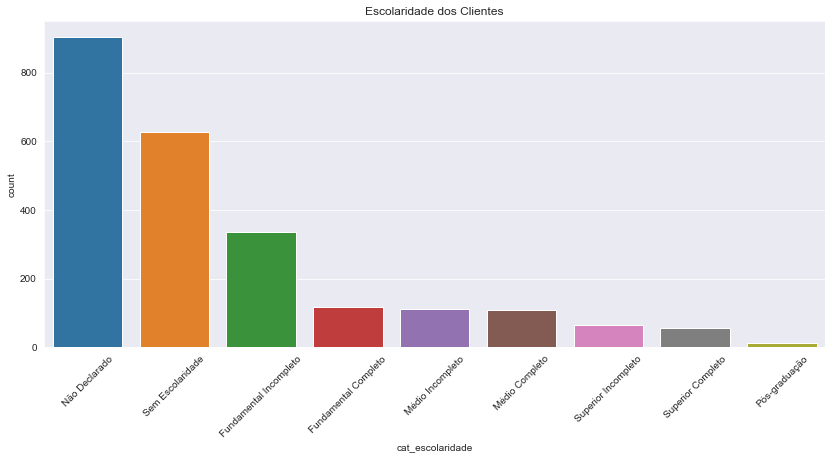

In [71]:
#Grafico Barras escolaridade
plt.figure(figsize =(14,6))
sns.countplot(data = df_12meses_sem_duplicados,x = 'cat_escolaridade', order = df_12meses_sem_duplicados['cat_escolaridade'].value_counts().index)
plt.title('Escolaridade dos Clientes')
plt.xticks(rotation = 45)
plt.show()

### Análise de Correlacao entre as variáveis do dataset

In [116]:
#Criar uma coluna numerica para a variavel cat_escolaridade
df_12meses_sem_duplicados['cat_escolaridade'] = df_12meses_sem_duplicados['cat_escolaridade'].astype(str)
encoder = LabelEncoder()
df_12meses_sem_duplicados['Escolaridade_Num'] = encoder.fit_transform(df_12meses_sem_duplicados['cat_escolaridade'])


In [99]:
df_12meses_sem_duplicados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407 entries, 10776 to 218250
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             2407 non-null   int64  
 1   data_referencia        2407 non-null   object 
 2   flag_inadimplente      2407 non-null   int64  
 3   data_concessao         2407 non-null   object 
 4   valor_emprestado       2407 non-null   float64
 5   valor_parcela          2407 non-null   float64
 6   valor_taxa             2407 non-null   float64
 7   valor_prazo            2407 non-null   int64  
 8   valor_renda            2407 non-null   float64
 9   valor_restritivos      2407 non-null   float64
 10  cat_escolaridade       2407 non-null   object 
 11  flag_cliente_ativo     2407 non-null   int64  
 12  cod_agencia            2407 non-null   int64  
 13  data_nascimento        2407 non-null   object 
 14  data_abertura_conta    2407 non-null   object 
 15

<AxesSubplot:>

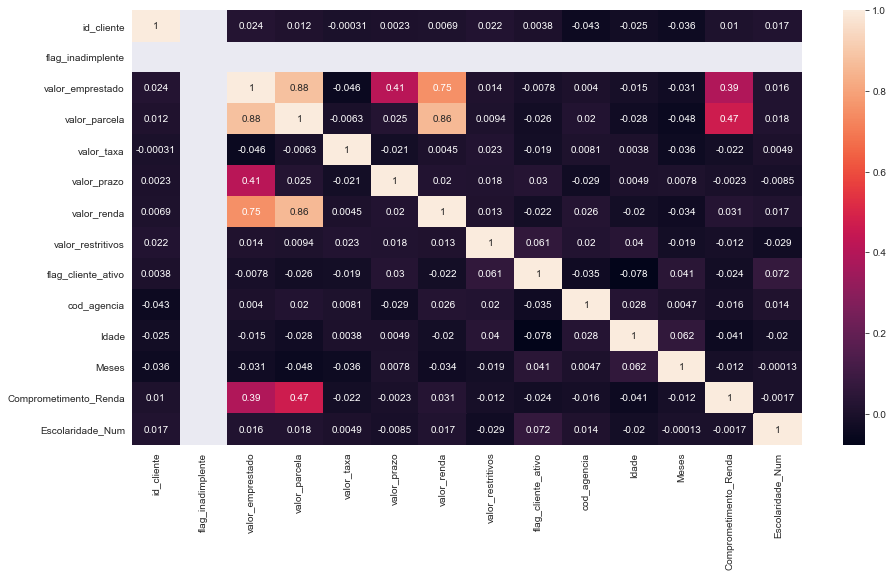

In [98]:
plt.figure (figsize = (15,8))
sns.heatmap(df_12meses_sem_duplicados.corr(), annot = True)

<Figure size 1296x576 with 0 Axes>

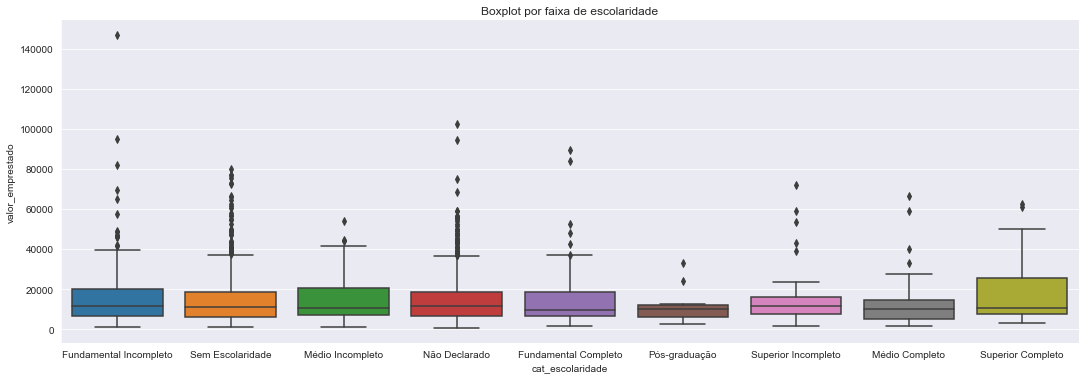

In [161]:
plt.figure(figsize =(18, 8))

sns.catplot(x = 'cat_escolaridade', y = 'valor_emprestado', data = df_12meses_sem_duplicados, kind ="box", aspect =3,legend='auto')
plt.title ("Boxplot por faixa de escolaridade")
plt.show()

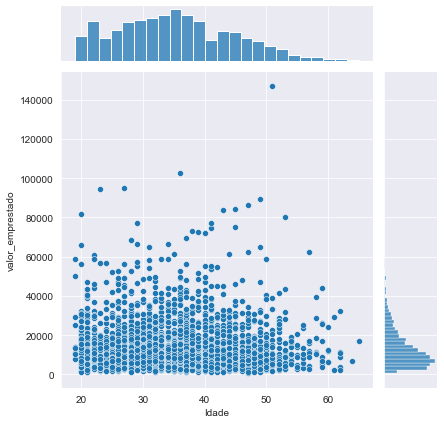

In [83]:
sns.jointplot(data = df_12meses_sem_duplicados, x = 'Idade', y ='valor_emprestado')

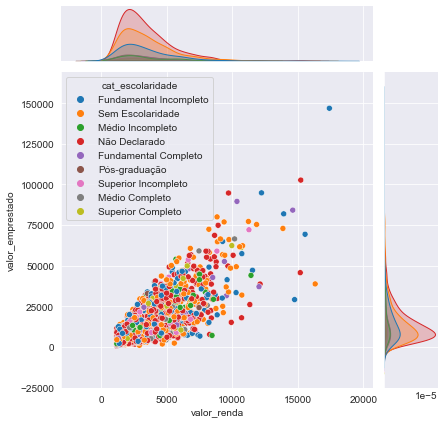

In [162]:
sns.jointplot(data = df_12meses_sem_duplicados, x = 'valor_renda', y ='valor_emprestado', hue = 'cat_escolaridade')

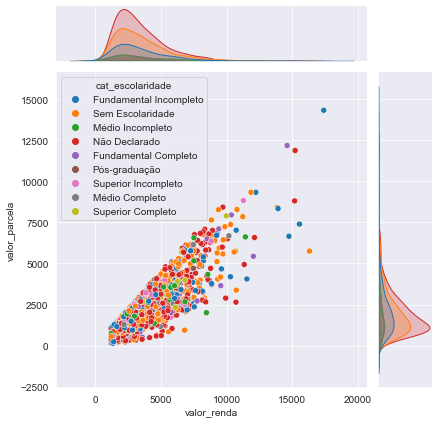

In [163]:
sns.jointplot(data = df_12meses_sem_duplicados, x = 'valor_renda', y ='valor_parcela', hue = 'cat_escolaridade')


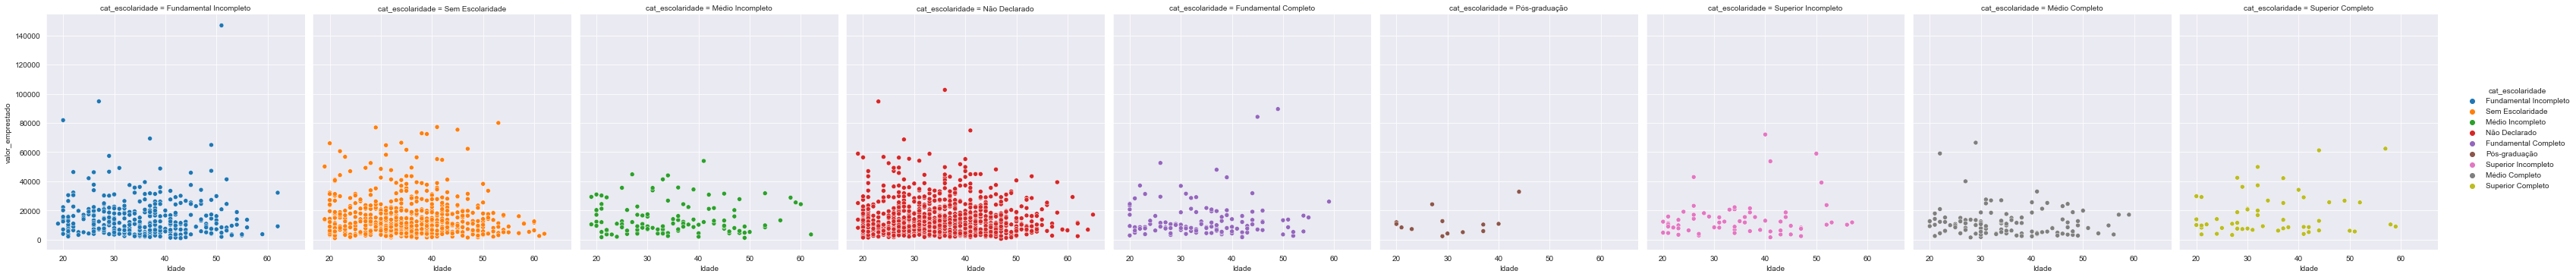

In [88]:
#fig, axs = plt.subplots(2, 4, figsize=(20, 10))

sns.relplot(
    data = df_12meses_sem_duplicados, x = "Idade", y = "valor_emprestado",
    col = "cat_escolaridade", hue = "cat_escolaridade",
    kind ="scatter")


In [118]:
dado = df_12meses_sem_duplicados.groupby('Idade').agg({'valor_emprestado': 'mean'})
dado.reset_index(inplace = True)
dado

,Idade,valor_emprestado
0,19,23438.363000
1,20,15187.421978
2,21,13937.275089
3,22,17029.629600
4,23,12848.059375
5,24,13960.788298
6,25,13270.680189
7,26,15875.552877
8,27,16454.367632
9,28,16694.797778


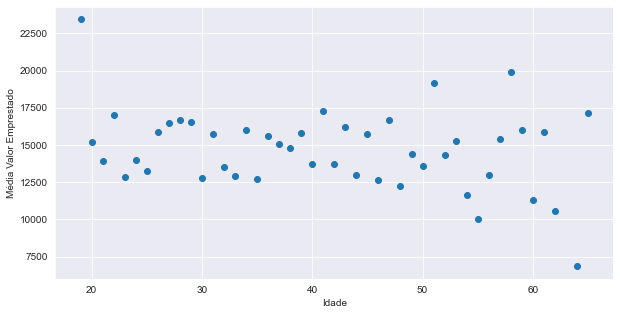

In [119]:
plt.figure(figsize=(10,5))
plt.scatter(x=dado.Idade, y=dado.valor_emprestado)
plt.xlabel('Idade')
plt.ylabel('Média Valor Emprestado')
plt.show()

In [120]:
dado_ = df_12meses_sem_duplicados.groupby('Idade').agg({'valor_renda': 'mean'})
dado_.reset_index(inplace = True)
dado_

,Idade,valor_renda
0,19,4354.069000
1,20,3433.980220
2,21,3524.133929
3,22,3866.859200
4,23,2815.863958
5,24,3353.261277
6,25,3412.053208
7,26,3448.073151
8,27,3751.028289
9,28,3435.146420


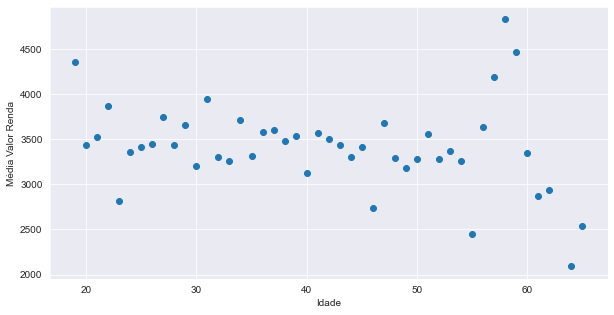

In [167]:
plt.figure(figsize=(10,5))
plt.scatter(x=dado_.Idade, y=dado_.valor_renda)
plt.xlabel('Idade')
plt.ylabel('Média Valor Renda')
plt.show()

# Fim